### Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests

%matplotlib inline

# Analysis

In [2]:
first_actual_row = 59 # all previous rows are some irrelevant metadata

df = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='ISO-8859-1', header= None)
a = df.drop(df.index[:first_actual_row]).reset_index(drop=True)
a.dropna(how='any', axis=0)

df = a.T # make patients as rows and [Class, IDs, and genes] as columns, for better readability
column_names = df.iloc[0] # get column names
df = df[1:] # don't include headers row in data
df.columns = column_names

C:\Users\neshe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.60175,5.94231,7.29051,8.98851,5.56795,5.55878,5.42944,4.48794,4.25429,5.37581
96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271,14.1637,14.8845,14.7925,4.9022,3.417,2.83474,2.78236,3.88208,3.74414
97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.8986,13.6824,14.8845,14.7838,5.23991,3.69918,3.24968,3.05673,3.64983,4.02154
98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847,13.5516,14.8581,14.7782,4.55613,3.48528,2.71141,2.83382,3.52341,3.81256


### a) High level description of the data and some pre-processing

1. There are 54675 genes profiles - each represented by a column (and as rows originally, before our pre-processing)
2. There are 99 samples (subjects/patients) in total - each represented by a row  (and as columns originally, before our pre-processing)

In [4]:
H, M = df['Class'].value_counts()
print(f'3. There are {H} H samples in the H class, and {M} M samples.')
print(f'\t(H – Healthy, M - Myocardial Infraction)')

3. There are 50 H samples in the H class, and 49 M samples.
	(H – Healthy, M - Myocardial Infraction)


##### 4. If there are missing values, then remove the entire row (gene) from the data matrix

In [5]:
df.dropna(axis='columns', inplace=True) # Removing columns with missing values
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.60175,5.94231,7.29051,8.98851,5.56795,5.55878,5.42944,4.48794,4.25429,5.37581
96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271,14.1637,14.8845,14.7925,4.9022,3.417,2.83474,2.78236,3.88208,3.74414
97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.8986,13.6824,14.8845,14.7838,5.23991,3.69918,3.24968,3.05673,3.64983,4.02154
98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847,13.5516,14.8581,14.7782,4.55613,3.48528,2.71141,2.83382,3.52341,3.81256


In [6]:
columns = df.shape[1]
print(f'After removing missing-values columns, our dataframe has {columns} columns')

After removing missing-values columns, our dataframe has 54630 columns


##### 5. Pick 20 genes at random. Draw histograms comparing expression levels of each of these genes in the two classes M and H

In [7]:
number_of_random_genes = 20

sample_df = df.sample(n=number_of_random_genes, axis='columns')
sample_df = sample_df.join(df['Class'])
sample_df

,235970_at,1570274_at,230807_at,206647_at,233262_at,1560744_at,217911_s_at,202506_at,215663_at,205069_s_at,...,229330_at,1559725_at,203746_s_at,210785_s_at,201302_at,220523_at,230987_at,221573_at,229105_at,Class
1,5.79146,4.31614,3.52301,4.02786,3.81185,5.562625876,7.0863,9.10639,8.30844,5.57122,...,6.42885,2.180481515,7.46453,9.24443,9.41121,2.80089,6.5423,6.65137,3.81018,H
2,5.0993,4.80984,3.88092,3.89743,4.64657,5.58842806,5.28757,8.93998,7.87169,3.26174,...,4.8576,2.518311757,6.86033,9.44066,9.18146,3.06887,7.59162,6.22748,4.34923,H
3,4.43557,4.53098,3.95905,3.7039,3.52136,5.747977303,7.62094,9.11089,8.23239,4.37875,...,6.81126,3.269660619,6.96953,8.11735,8.55905,3.03716,7.85425,6.64367,4.32637,H
4,4.45641,4.59787,3.61416,3.89319,3.25231,5.980473819,6.33531,9.30038,8.24241,4.89636,...,5.61224,3.394187322,6.29605,9.02489,8.85947,2.82217,7.32838,7.17532,4.19684,H
5,5.76946,4.74197,3.6148,3.7308,3.16741,5.991672569,6.90566,8.78912,8.47573,4.17285,...,6.89879,2.314734941,7.14069,8.95867,8.37119,2.68602,8.16087,6.03543,4.35587,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.23638,6.65552,5.36553,5.5492,6.67399,6.443750052,6.00545,8.40734,4.37663,7.08303,...,5.37231,5.423391233,5.25439,6.33771,5.8415,4.10241,5.83638,6.42601,5.52494,M
96,4.16503,4.90944,3.80981,4.45166,3.39729,6.311601501,4.24383,10.5169,3.72321,3.6842,...,4.73124,5.357274306,3.94636,9.21251,9.47847,2.7887,6.9145,5.61807,6.59656,M
97,4.91052,4.86709,4.25865,4.38618,7.19906,6.347714388,7.67038,10.3033,6.75289,3.75978,...,5.5592,2.503887932,9.46644,9.03469,9.05817,3.15594,7.79847,5.94334,4.49422,M
98,6.36308,4.7943,3.6559,3.802,2.09665,5.886800739,7.35269,10.2753,7.06232,3.42152,...,6.80234,2.285056786,6.62465,8.15936,9.38646,3.08165,6.7963,6.00549,5.60586,M


In [8]:
mask = sample_df['Class'] == 'H'
sample_df_H = sample_df[mask]
sample_df_M = sample_df[~mask]

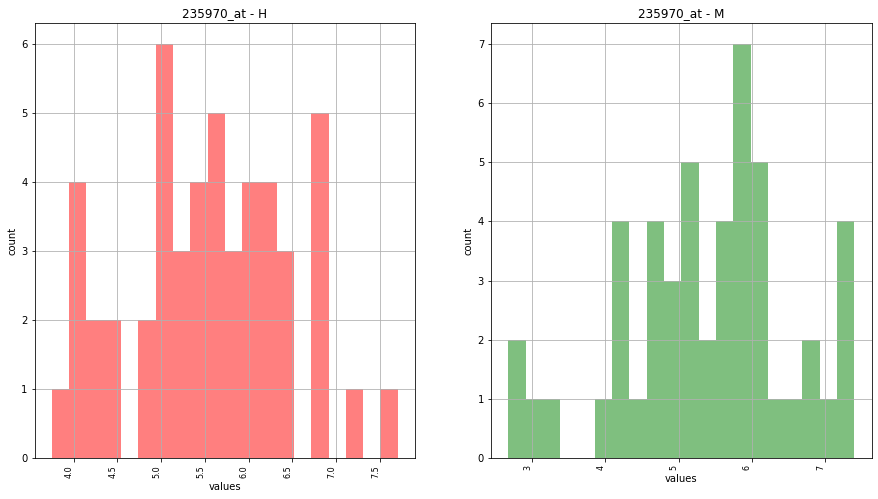

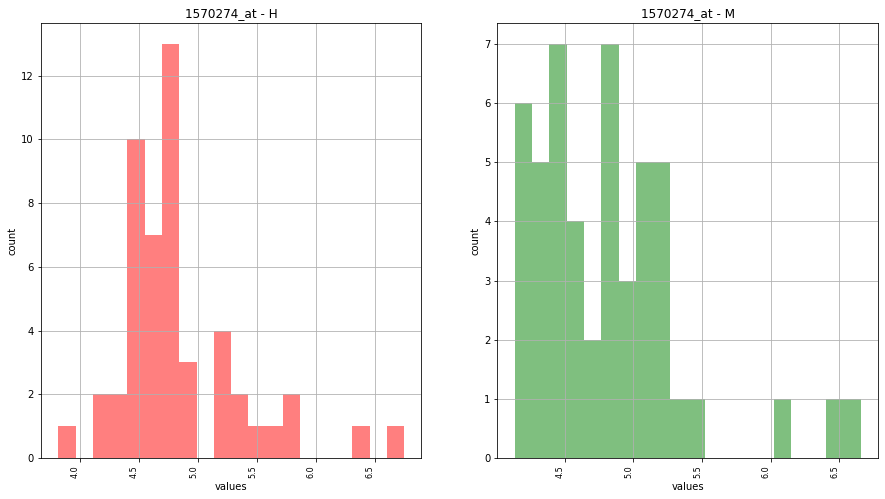

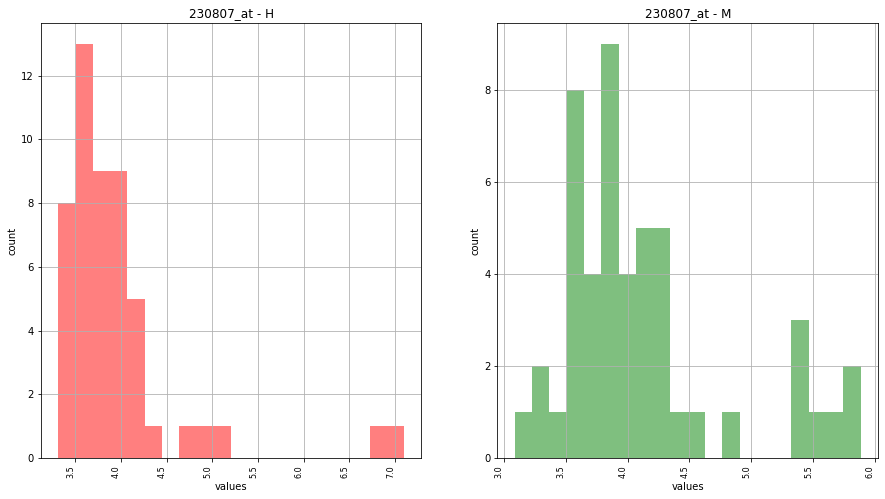

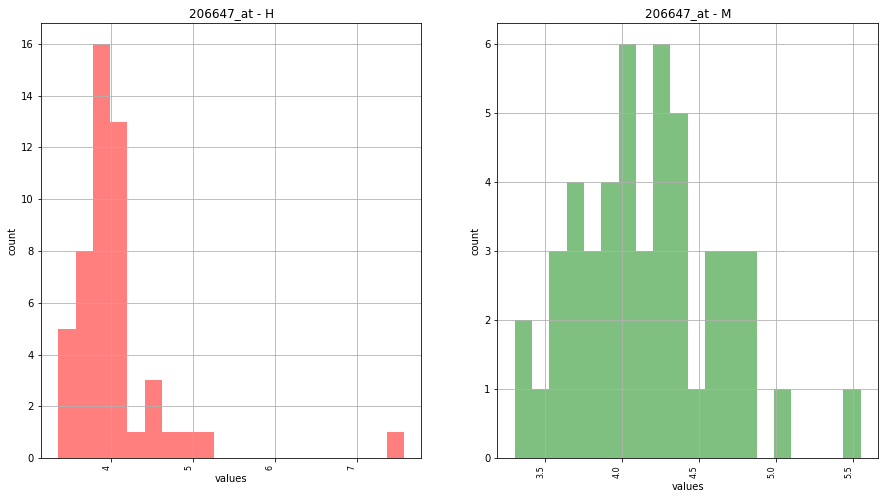

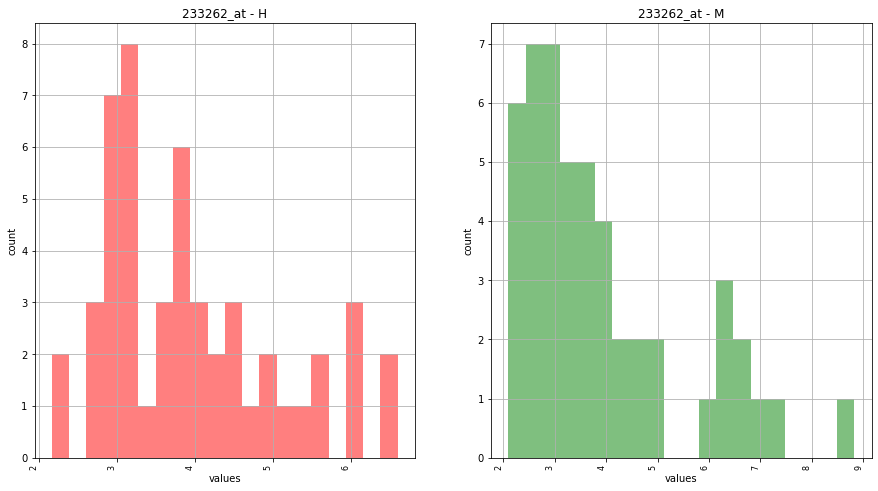

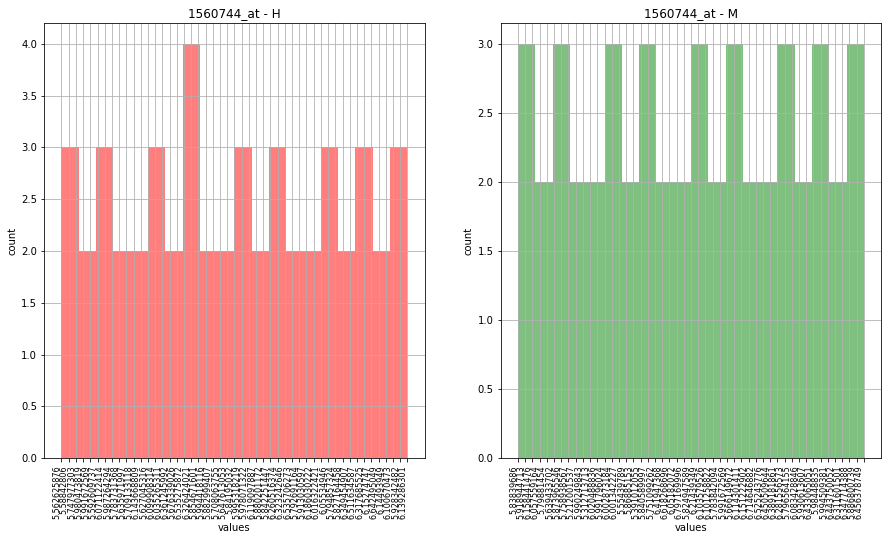

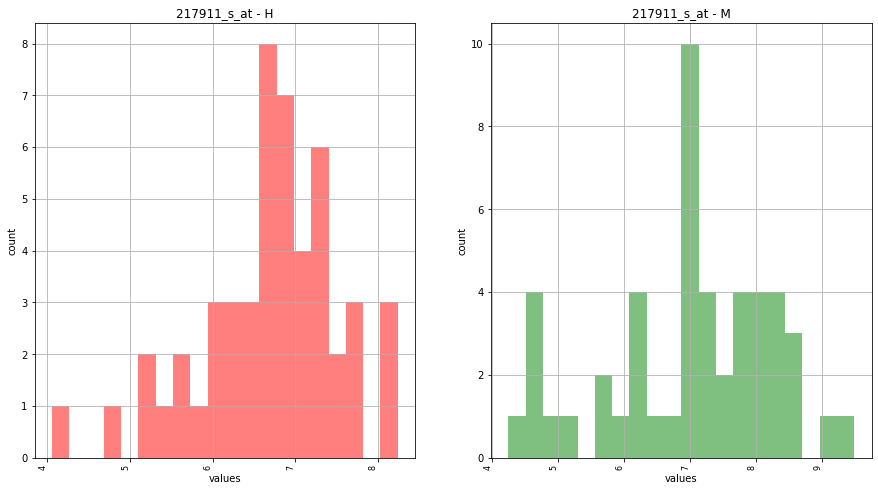

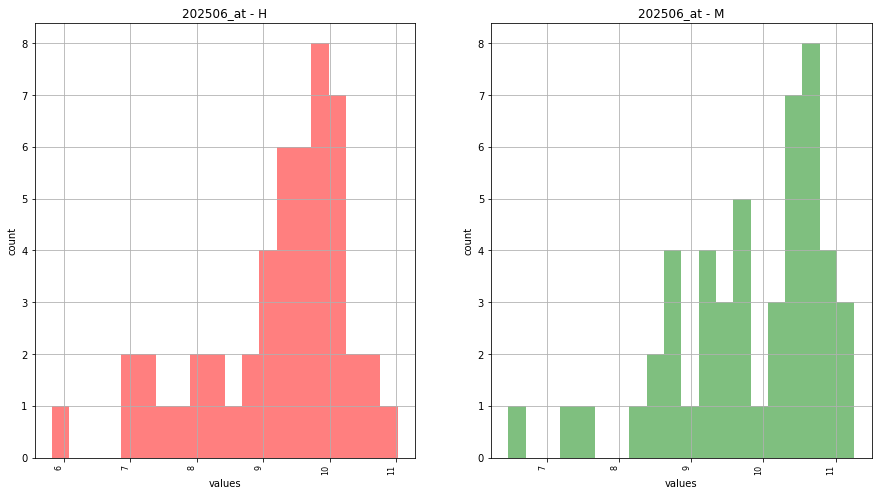

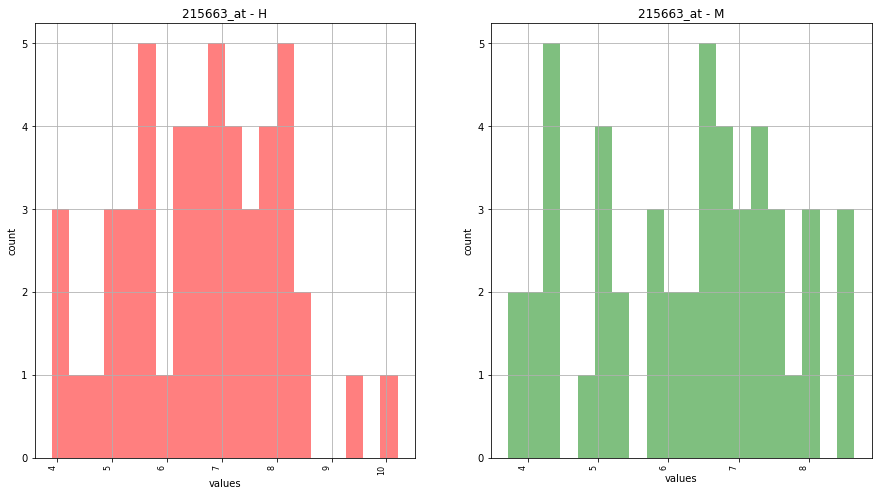

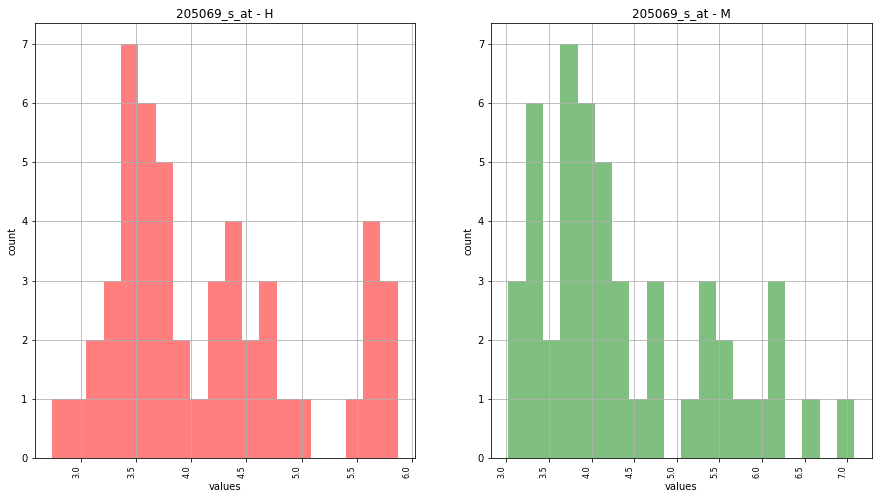

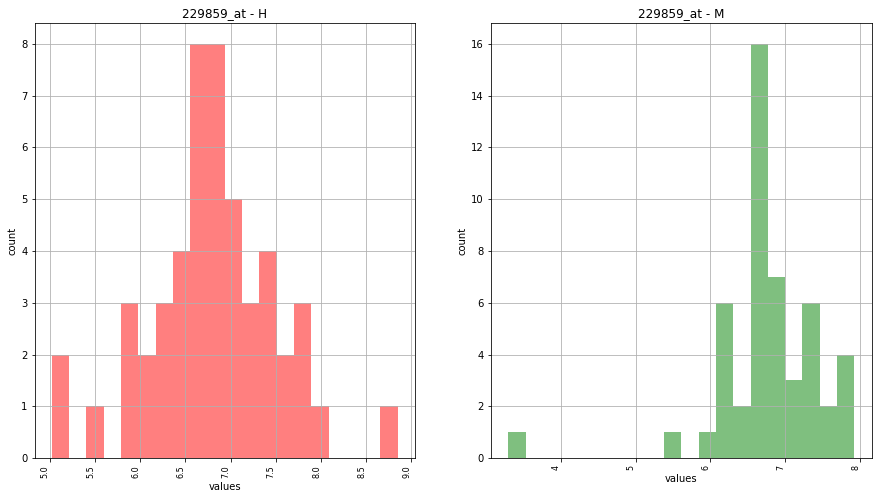

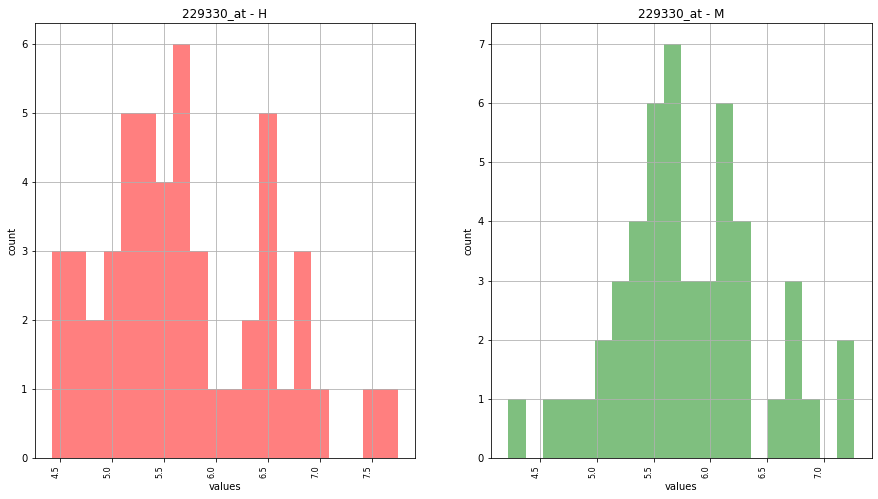

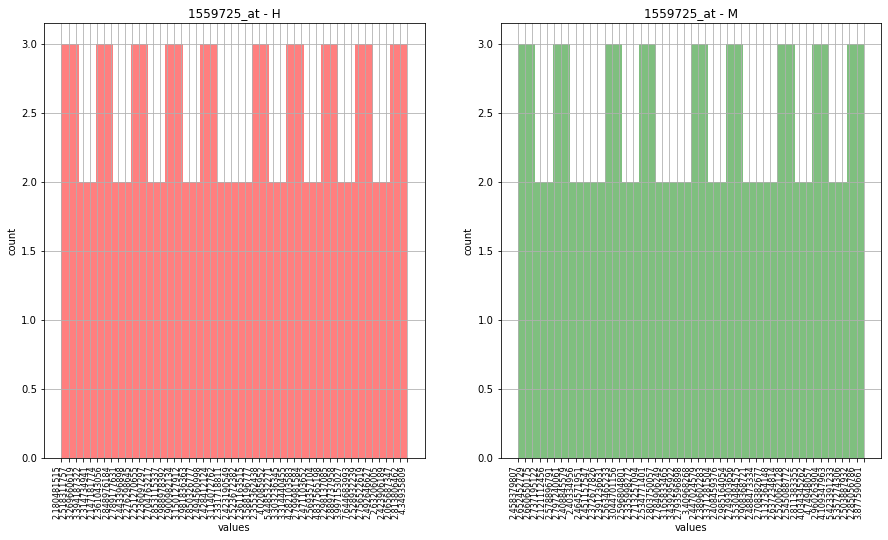

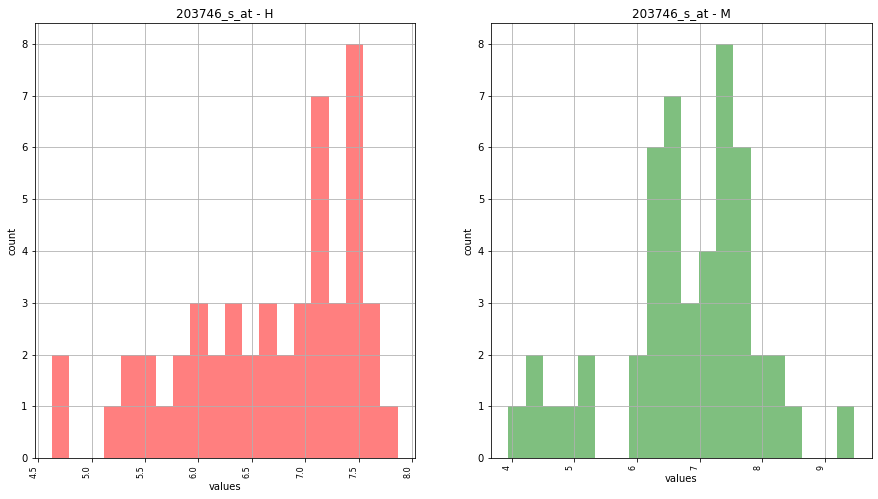

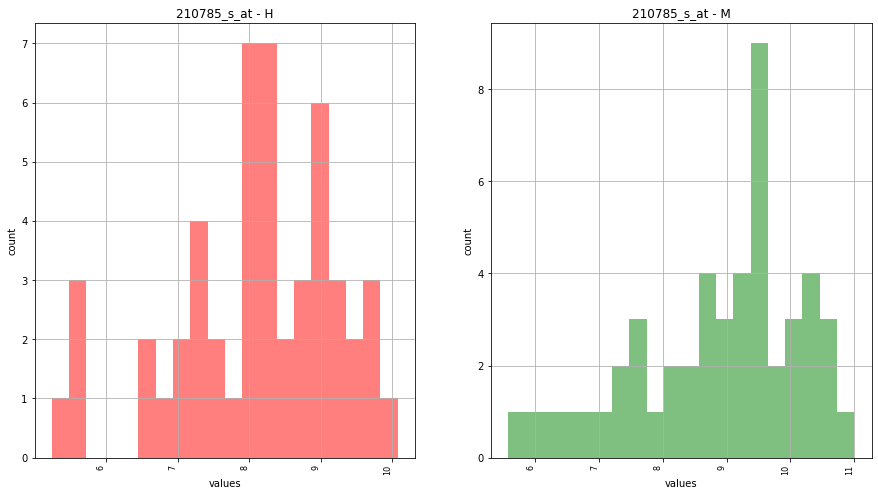

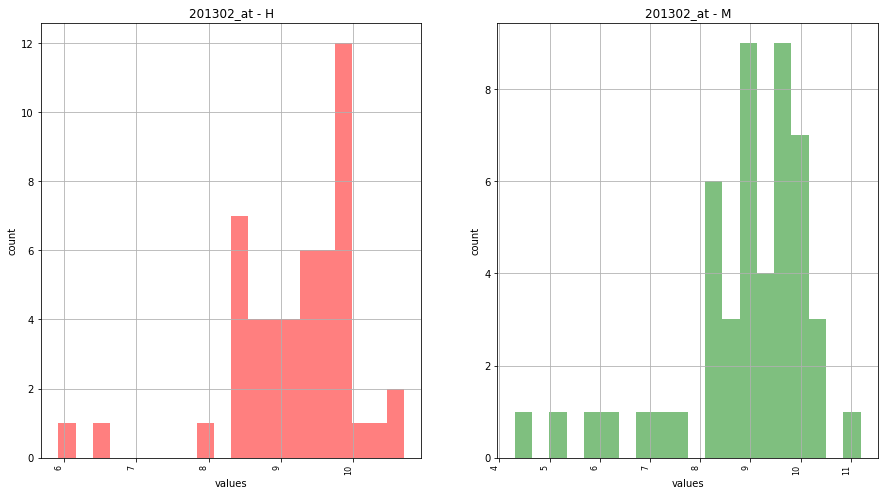

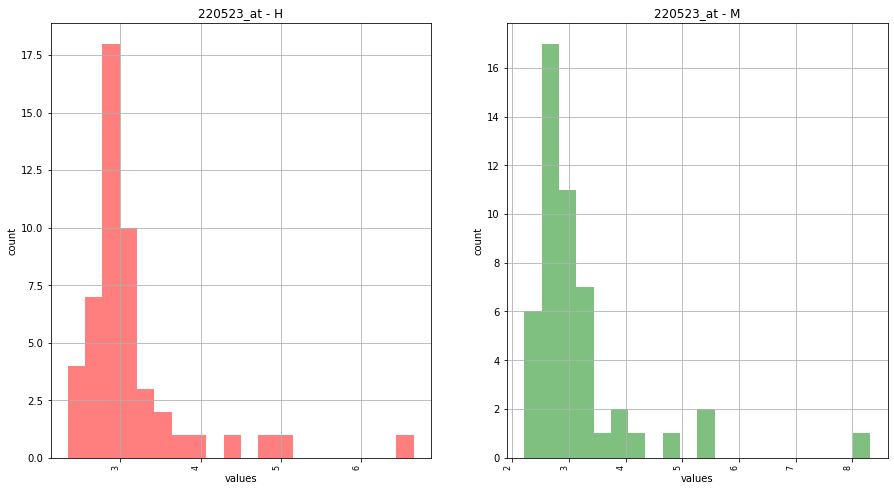

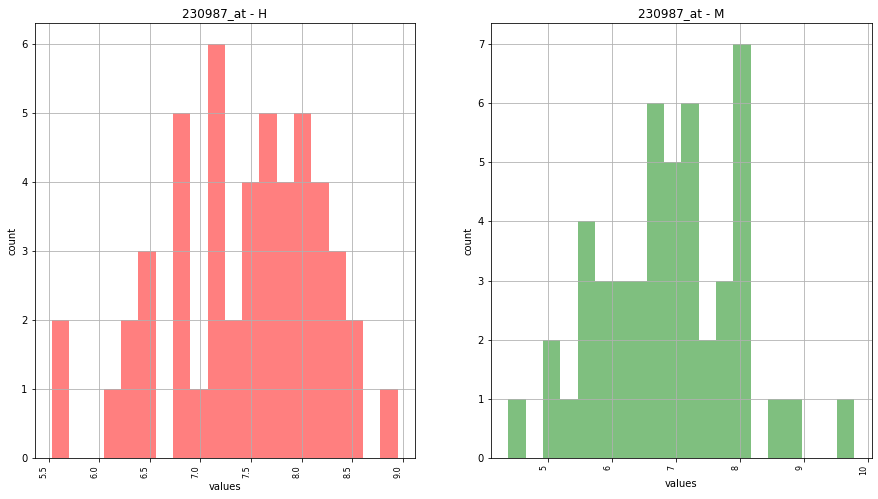

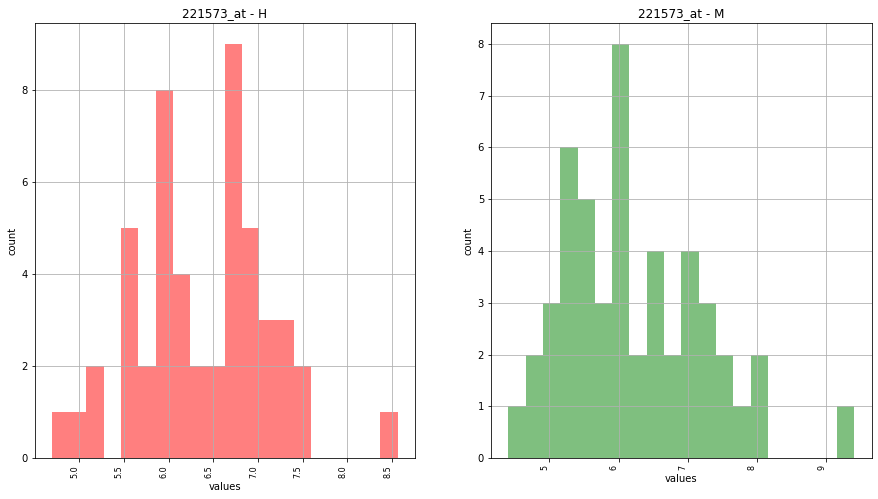

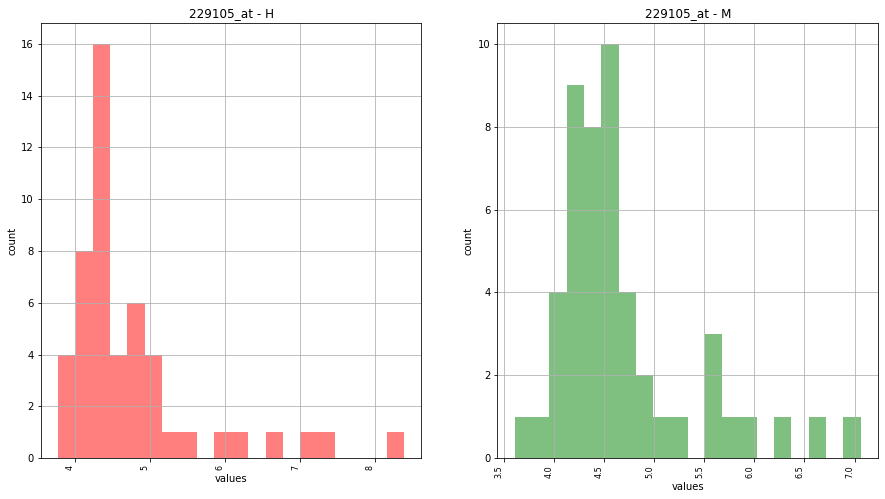

In [9]:
BINS = 20
x_label = 'values'
y_label = 'count'


# iterating the columns 
for col in sample_df.columns:
    if col == 'Class':
        break
    
    fig, ax = plt.subplots(1,2, figsize=(15,8))
    ax[0].hist(sample_df_H[col], BINS, alpha = 0.5, color = 'r')
    ax[1].hist(sample_df_M[col], BINS, alpha = 0.5, color = 'g')
    
    ax[0].grid(zorder=0)
    ax[1].grid(zorder=0)

    ax[0].title.set_text(f'{col} - H')
    ax[1].title.set_text(f'{col} - M')
    
    ax[0].set_xlabel(x_label)
    ax[1].set_xlabel(x_label)
    
    ax[0].set_ylabel(y_label)
    ax[1].set_ylabel(y_label)
    
    ax[0].tick_params(axis='x', which='major', labelsize=8)
    ax[1].tick_params(axis='x', which='major', labelsize=8)
    
#     fig.autofmt_xdate()

    plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
    
    plt.show()

***
### b) WRS for differential expression (DE)

1. Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

##### Answer:
$\mu_T = \frac{|M|(N+1)}{2} = \frac{49 \cdot (99+1)}{2} = 2450$

2. Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

##### Answer:
Remember that there are 49 M samples.<br>
The maximal value is when all M patients have ranks 51 to 99:<br>
$c = max \big(RS(g) \big) = \frac{49(51+99)}{2} = 3675$

3. Under the null model, what is the probability of RS(g) = c? (provide a formula for this and explain it)

##### Answer:
P(A) = (# of ways A can happen) / (Total number of outcomes)<br>

Recall that $P(A) = \frac {n(A)}{\Omega}$ where $\Omega$ is the total number of outcomes (the probability sample space).<br>
P(A) = "What is the probability that a specific example is in A"

Under the null model we have the same probability to get rank c (maximal RS from before). 
In our case, we choose 49 patients out of 99 without repetitions and for those 49, we have 49! permutations to order their ranks such that the sum will equal c.<br>
Denominator: Total number of options, $\Omega = {N \choose |M|} |M|! = {99 \choose 49} 49!$<br>
Numerator: In order to sum up to the specific RS c, we have only a <u>single option</u> (of ranks) for it.<br>
For those ranks we have 49 permutations to distribute the samples among them (49! options to distribute 49 patients).<br>

So overall $$P\big(RS(g) = c\big) = \frac {|M|!}{{N \choose |M|} |M|!} = \frac {1}{{N \choose |M|}} = \frac {1}{{99 \choose 49}}$$

4. Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (provide formulas and explain them)

##### Answer:
$P\big(RS(g) = c-1 \big)$ is the same as the previous value.<br>
For c we need all M samples to spread on ranks 51-99<br>
So for c-1, we simply need to change the sample whose rank is 51 to have rank 50 (and thus decrement c by 1)<br>
$$P\big(RS(g) = c-1 \big) = P\big(RS(g) = c\big) = \frac {|M|!}{{N \choose |M|} |M|!} = \frac {1}{{N \choose |M|}} = \frac {1}{{99 \choose 49}}$$


For c-2 we need all M samples to spread on ranks 49,52-99 <b>OR</b> 50-98 --- both decrementing c by 2 overall.<br>
Tthe denominator is similar by definition of $\Omega$. The numerator is now $2\cdot 49!$ because there are 2 distributions of samples such that the sum of their ranks equal c-2
$$P\big(RS(g) = c-2 \big) = \frac {2 \cdot |M|!}{{N \choose |M|} |M|!} = \frac {2}{{N \choose |M|}} = \frac {2}{{99 \choose 49}}$$

<!--  not sure this is true
And in general $\forall 1 \leq x \leq c$:
$$P\big(RS(g) = c-x \big) = \frac {x \cdot |M|!}{{N \choose |M|} |M|!} = \frac {x}{{N \choose |M|}} = \frac {x}{{99 \choose 49}}$$ -->

5. Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribtuion.

##### Answer:

Text(0.5, 0, 'RS(g)')

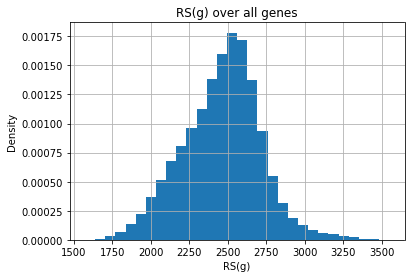

In [10]:
def calculate_RS(g):
    ranks = g.rank() # get ranks of all samples fot this gene g
    return ranks[M_samples].sum() # sum of the ranks of ONLY the 'M' samples for this gene g


H_samples = df['Class'] == 'H'
M_samples = df['Class'] == 'M'

ranked_df = df.iloc[:,2:].apply(calculate_RS, axis=0) # apply the function on every gene
ranked_df.hist(bins=30, density=True)

plt.title('RS(g) over all genes')
plt.ylabel('Density')
plt.xlabel('RS(g)')

In [11]:
q75, q25 = np.percentile(ranked_df, [75 ,25])
iqr = q75 - q25 # stats.iqr(ranked_df)
print(f'The IQR for this distribution is {iqr}')

The IQR for this distribution is 328.0


***
### c) Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M.<br>
Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.<br>
Report the number of genes overexpressed in M vs H at a p-value better (≤) than 0.07, and genes underexpressed in M vs H at a p-value of better than 0.07<br>
For both directions use both a Student ttest and a WRS test.

##### Answer:

In [12]:
alpha = 0.07 # certainty of 93%

##### TTEST:

In [13]:
def calculate_ttest(g):
    '''Calculate the T-test for the means of two independent samples of scores'''
    # this is the one Zohar mentioned in class
    return stats.ttest_ind(g[M_samples].astype('float'), g[H_samples].astype('float'), equal_var = False)


# starting from index 2 which is the first gene (0 is "Class" and 1 is "ID")
TTEST_df = df.iloc[:,2:].apply(calculate_ttest, axis=0, result_type='expand')
TTEST_df.index=['statistic', 'p-value']

# TTEST_df

In [14]:
TTEST_values = TTEST_df.T['statistic'] # The calculated t-statistic
TTEST_p_values = TTEST_df.T['p-value'] / 2  # Since "ttest_ind()" returns the 2-tailed p-value of the test, we divide the values by 2 ("...a two-sided test for the null hypothesis")

TTEST_overexpressed_genes_df = TTEST_df.T[(TTEST_values > 0) & (TTEST_p_values < alpha)]
TTEST_underexpressed_genes_df = TTEST_df.T[(TTEST_values <= 0) & (TTEST_p_values < alpha)]

print(f'TTEST overexpressed genes in M vs H is {TTEST_overexpressed_genes_df.shape[0]}') # shape[0] for the number of rows left after filtering
print(f'TTEST underexpressed genes in M vs H is {TTEST_underexpressed_genes_df.shape[0]}')

TTEST overexpressed genes in M vs H is 8489
TTEST underexpressed genes in M vs H is 8634


##### WRS:

In [15]:
def calculate_WRS(g):
    return stats.ranksums(g[M_samples], g[H_samples]) # sum of VALUES of ONLY the 'M' samples for this gene g


# starting from index 2 which is the first gene (0 is "Class" and 1 is "ID")
WRS_df = df.iloc[:,2:].apply(calculate_WRS, axis=0, result_type='expand')
WRS_df.index=['statistic', 'p-value']

# WRS_df

In [16]:
WRS_values = WRS_df.T['statistic'] # The test statistic under the large-sample approximation that the rank sum statistic is normally distributed
WRS_p_values = WRS_df.T['p-value'] / 2  # Since "ranksums()" returns the 2-sided p-value of the test, we divide the values by 2

WRS_overexpressed_genes_df = WRS_df.T[(WRS_values > 0) & (WRS_p_values < alpha)]
WRS_underexpressed_genes_df = WRS_df.T[(WRS_values <= 0) & (WRS_p_values < alpha)]

print(f'WRS overexpressed genes in M vs H is {WRS_overexpressed_genes_df.shape[0]}') # shape[0] for the number of rows left after filtering
print(f'WRS underexpressed genes in M vs H is {WRS_underexpressed_genes_df.shape[0]}')

WRS overexpressed genes in M vs H is 10763
WRS underexpressed genes in M vs H is 10619


***
### d) Correlations

In [32]:
# Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in section c
n = 80
over_significant_df = WRS_overexpressed_genes_df.sort_values(by='p-value').head(n) # sorting by the p-values
under_significant_df = WRS_underexpressed_genes_df.sort_values(by='p-value').head(n)

# Generate a set of 160 genes, D, which is the union of the above two sets
D = over_significant_df.append(under_significant_df)
D_df = df[D.index].astype('float')

1. Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap

In [33]:
D_kendall_correlations_df = D_df.corr(method='kendall') # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

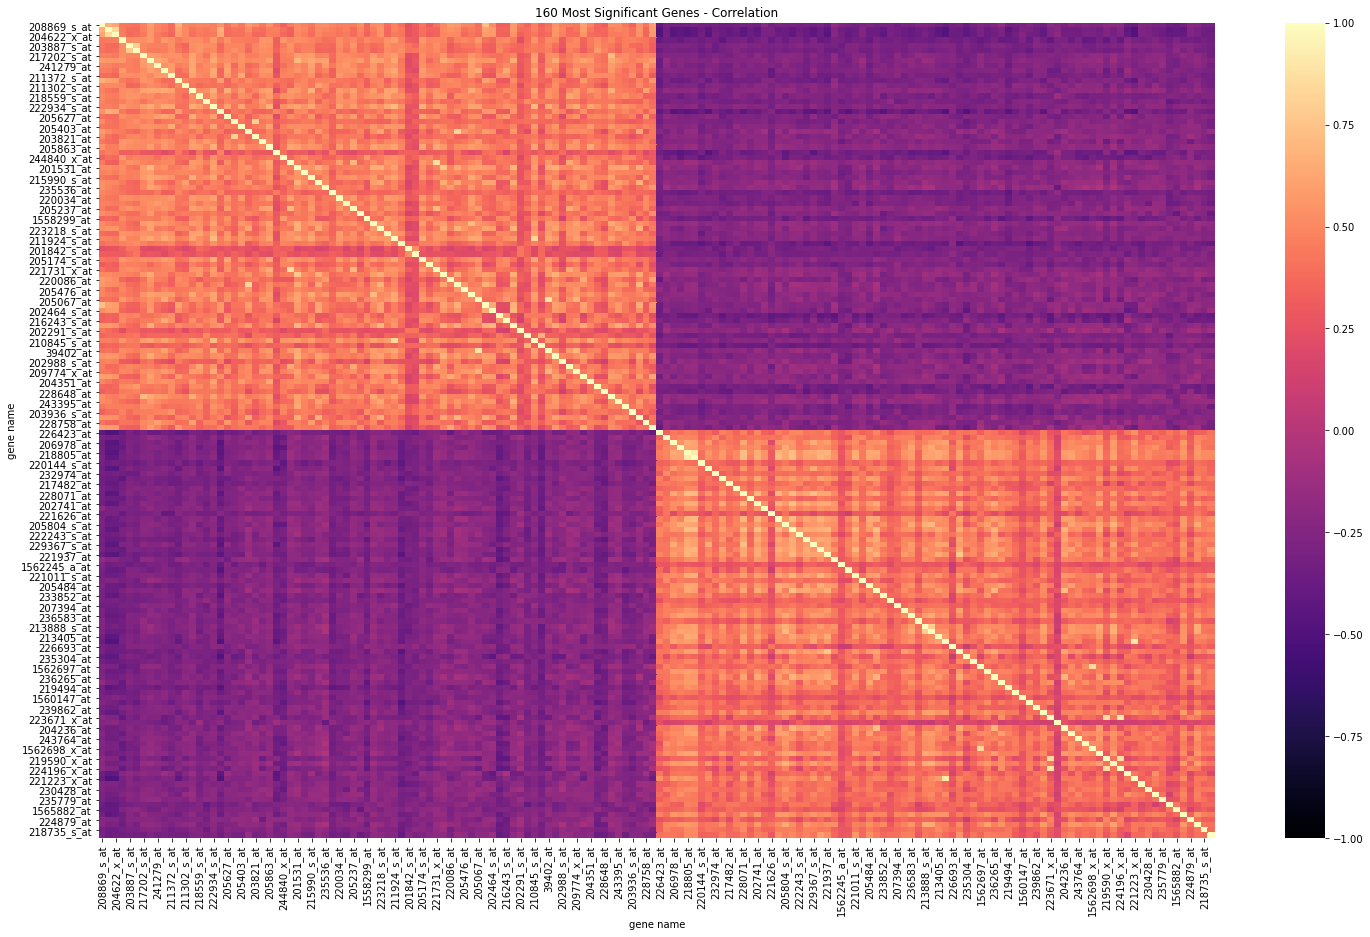

In [34]:
plt.figure(figsize = (25,15))
sns.heatmap(D_kendall_correlations_df, cmap= 'magma', vmin=-1, vmax=1)

plt.title(f'{n*2} Most Significant Genes - Correlation')
plt.xlabel('gene name')
plt.ylabel('gene name')
plt.show()

2. Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏? 
What is the observed mean of the numbers you calculated in the above section?

##### Answer:
Under a NULL model that assumes that genes are pairwise independent, the expected value for 𝜏 would be 0 --> For each pair of genes, their ranks will be reltively mixed and thus number of concordant pairs will eqaul the number of discordant pairs.<br>

In [35]:
kendall_mean = np.mean(D_kendall_correlations_df.mean())

print(f'The observed mean of the numbers we calculated in the above section is {kendall_mean}')

The observed mean of the numbers we calculated in the above section is 0.09039094759869867


3. What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression levels of genes, across a set of samples)? Do we observe any significant co-expression? Explain your answer

##### Answer:
There is a moderate **positive** co-expression among most overexpressed genes and also among most underexpressed genes (areas are mostly orange and values are mostly 0.5, with some values 0 and some higher).<br>
This means that for samples (people) where gene g1 is overexpressed, g2 is also moderatley overexpressed, and similarly with the underexpressed genes.<br>
Also, we can see that the co-expression between the overexpressed and underexpressed genes is relatively negative (area is mostly purple and values range from -0.25 to -0.5).<br>

This is what we expected - that the co-expression between an overepressed gene and an underexpressed gene will be negative. 

4. How many co-expressed pairs do we observe in FDR=0.05?

##### Answer:
We expect to see (5% of 54630 =) 2731 genes that appear to be interesting, even when they are not.<br>
We observed XXX co-expressed pairs (among all overexpressed and all among underexpressed)
We expect to see XXX co-expressed pairs in FDR = 0.05 since it is 

$$
FDR(p) = \frac {pN}{O(p)} \newline
$$

5. What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D? 

##### Answer:
The advantage of cacluting all pairs is with the runtime:<br>
We are talking about |genes|^2 pairs which is 54000^2 = ~3 Billion pairs - not reasonable to calculate so many and plot a heatmap of those pairs.<br>
By computing only the co-expressions for the most overexpressed/underexpressed, we save time and focus on the interesting genes expressions between M and H.<br>
We also assume that it will give us the most interesting insights and we expect that the co-expression between the overexpressed genes and underexpressed genes to be negative.

6. Perform the above steps on the same set D, but restrict attention only to samples labeled M. What do you see now? Can you explain this?

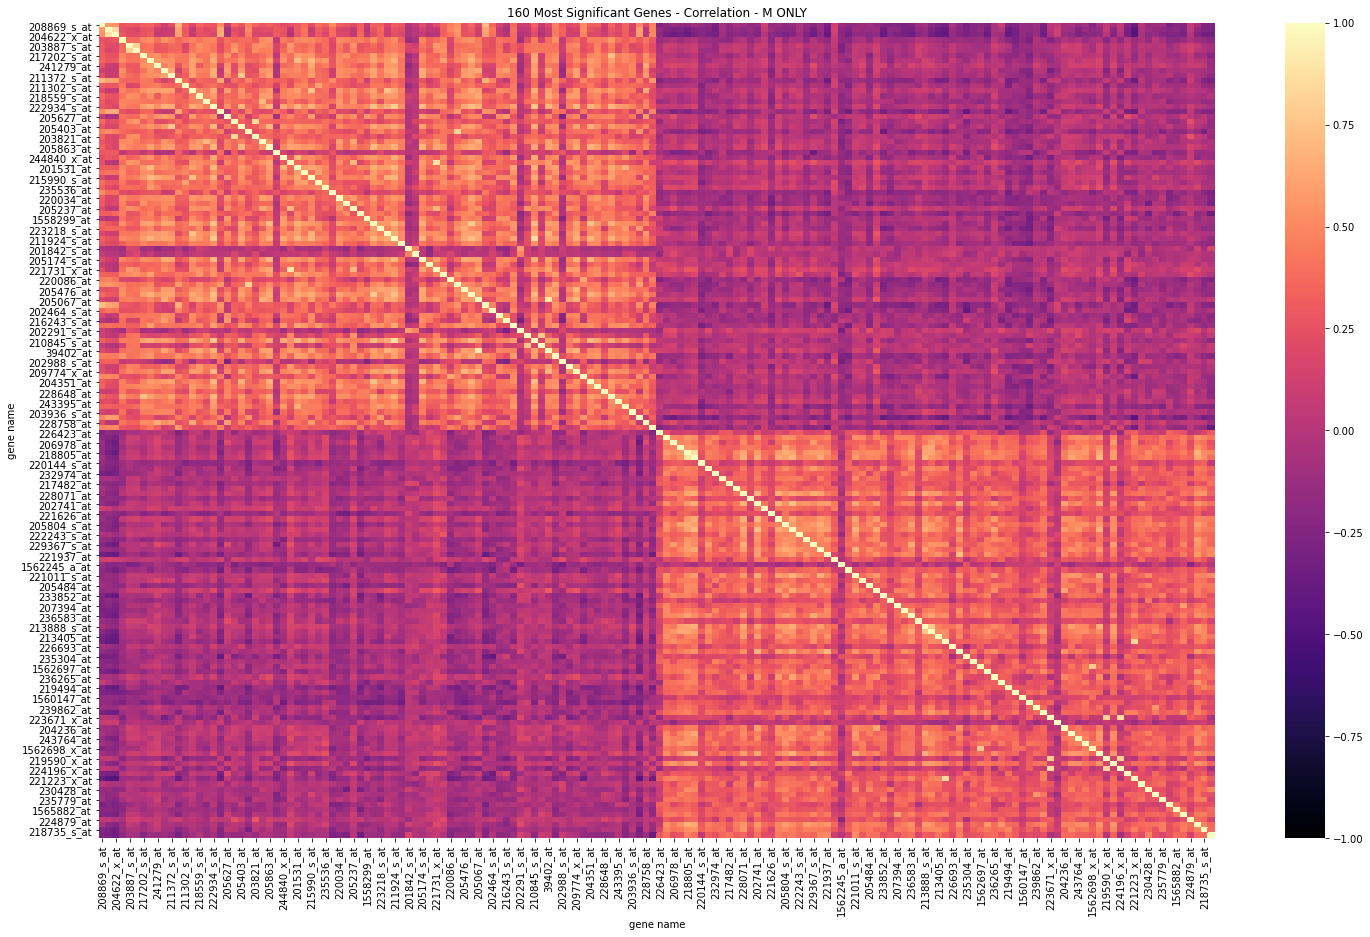

In [21]:
M_df = D_df[M_samples] # 49X160
M_kendall_correlations_df = M_df.corr(method='kendall')

plt.figure(figsize = (25,15))
sns.heatmap(M_kendall_correlations_df, cmap= 'magma', vmin=-1, vmax=1)

plt.title(f'{n*2} Most Significant Genes - Correlation - M ONLY')
plt.xlabel('gene name')
plt.ylabel('gene name')
plt.show()

By restricting the attention only to the samples from class M, we see less (amount of) significant positive/negative correlations between over/under-expressed genes (more values are around 0 now).<br>
We are expecting some of these most significant over/under-expressed genes to have a noticable differences <u>between the healthy and sick patients</u>, so by not taking the healthy into consideration, we "remove" the impact of the healthy patients.<br>
For example, if 10 genes are overexpressed in the M samples compared to the H samples, we remove this weight now (which increased the correlation value originally) and end up with a group of overexpressed genes, but since all values are relatively high now, the correlations are smaller overall.

***
### e) Plots and Conclusions of the DE and correlation analysis

1.1. Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c
##### Answer:

In [63]:
def calculate_DE_overabundance(statistic_df, test_name):
    number_of_genes = statistic_df.shape[0] # number of rows
    overabundance_df = statistic_df.copy()
    
    overabundance_df['statistic'] = overabundance_df['statistic'].abs()
    # p_value is the probability to get this many samples from our sample distribution, assuming the null hypthesis
    overabundance_df['expected'] = overabundance_df['p-value'] * number_of_genes
    overabundance_df['actual'] = overabundance_df['statistic'].rank(ascending = False)   
    
    ax = overabundance_df[['expected', 'actual', 'p-value']]
    ax = ax.sort_values(by='p-value').plot(x='p-value')
    
    ax.set_title(f'{test_name} overabundance graph')
    plt.ylabel('number of genes')
    ax.set_xscale('log') # Zohar showed this kind of scale in class
    plt.show()

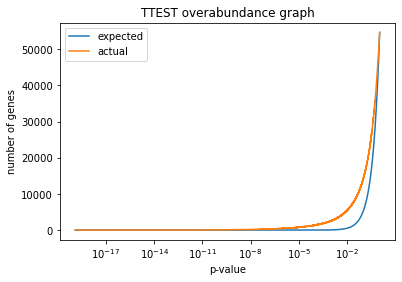

In [64]:
TTEST_overabundance_df = calculate_DE_overabundance(TTEST_df.T, 'TTEST')

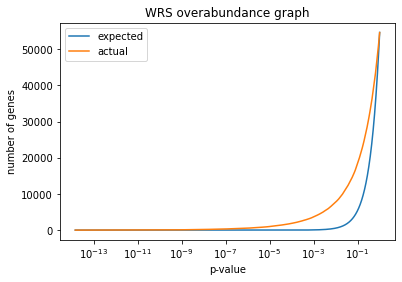

In [66]:
WRS_overabundance_df = calculate_DE_overabundance(WRS_df.T, 'WRS')

1.2. State, for each comparison, the number of genes, k, at which we observe:<br>
a) FDR = 0.05<br>
b) FDR = 0.01<br>
c) FDR = 0.005<br>
If these events are not observed at any k, then make that statement.

##### Answer:

In [102]:
def calculate_FDR(df, test_name):
    FDR_alpha_values = [0.05, 0.01, 0.005]
    fdr = df['p-value'] * df['p-value'].size / df['p-value'].rank()
    
    for alpha in FDR_alpha_values:
        print(f'We observed {fdr[fdr <= alpha].count()} genes at FDR <= {alpha}, using a {test_name} test')

In [103]:
calculate_FDR(TTEST_df.T, 'TTEST')
print('---------')
calculate_FDR(WRS_df.T, 'WRS')

We observed 3905 genes at FDR <= 0.05, using a TTEST test
We observed 1948 genes at FDR <= 0.01, using a TTEST test
We observed 1545 genes at FDR <= 0.005, using a TTEST test
---------
We observed 6539 genes at FDR <= 0.05, using a WRS test
We observed 3078 genes at FDR <= 0.01, using a WRS test
We observed 2300 genes at FDR <= 0.005, using a WRS test


2. Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE

##### Answer:

In [139]:
D_new = D.sample(n=3)
D_new = df[D_new.index].astype('float')
D_new.head()

,211597_s_at,228758_at,39402_at
1,11.477246,6.162166,9.958328
2,11.118540,4.717933,8.099267
3,11.308399,5.540611,6.328538
4,11.012151,4.840847,7.990168
5,10.741166,6.266409,8.610360


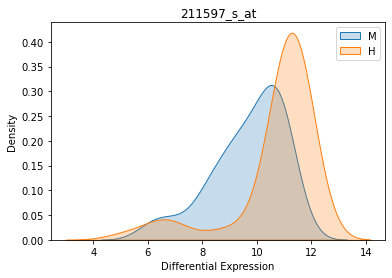

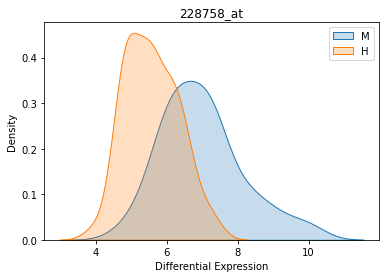

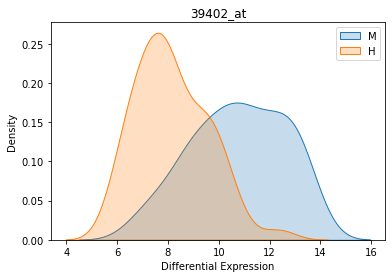

0
211597_s_at    None
228758_at      None
39402_at       None
dtype: object

In [148]:
def plot_expression_patterns(g):
    '''Plot differential expression (DE) values observed for each gene in H vs M'''
    sns.kdeplot(g[M_samples], shade=True, label='M')
    sns.kdeplot(g[H_samples], shade=True, label='H')
    plt.title(g.name)
    plt.xlabel('Differential Expression')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


D_new.apply(plot_expression_patterns, axis=0)

3. Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect

##### Answer:

In [149]:
exp_values = list(range(2,15))
exp_df = pd.DataFrame(np.zeros((len(D_df.T.index), len(exp_values))),columns=exp_values,index=D_df.T.index)

for index, row in D_df.T.iterrows():
    for value in row:
        exp_df.loc[index,int(value)] += 1

exp_df.index.name = "Gene"

exp_df

,2,3,4,5,6,7,8,9,10,11,12,13,14
Gene,,,,,,,,,,,,,
208869_s_at,0.0,0.0,0.0,0.0,3.0,20.0,38.0,22.0,16.0,0.0,0.0,0.0,0.0
216248_s_at,0.0,5.0,8.0,19.0,15.0,10.0,14.0,13.0,6.0,9.0,0.0,0.0,0.0
204622_x_at,0.0,0.0,1.0,6.0,25.0,14.0,12.0,14.0,12.0,10.0,5.0,0.0,0.0
244054_at,0.0,0.0,1.0,9.0,23.0,26.0,15.0,14.0,10.0,1.0,0.0,0.0,0.0
203887_s_at,0.0,0.0,20.0,32.0,16.0,8.0,11.0,6.0,5.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227626_at,0.0,2.0,4.0,9.0,14.0,17.0,33.0,18.0,2.0,0.0,0.0,0.0,0.0
224879_at,0.0,0.0,0.0,1.0,4.0,9.0,31.0,52.0,2.0,0.0,0.0,0.0,0.0
209268_at,0.0,0.0,0.0,1.0,8.0,8.0,22.0,42.0,18.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Gene'>

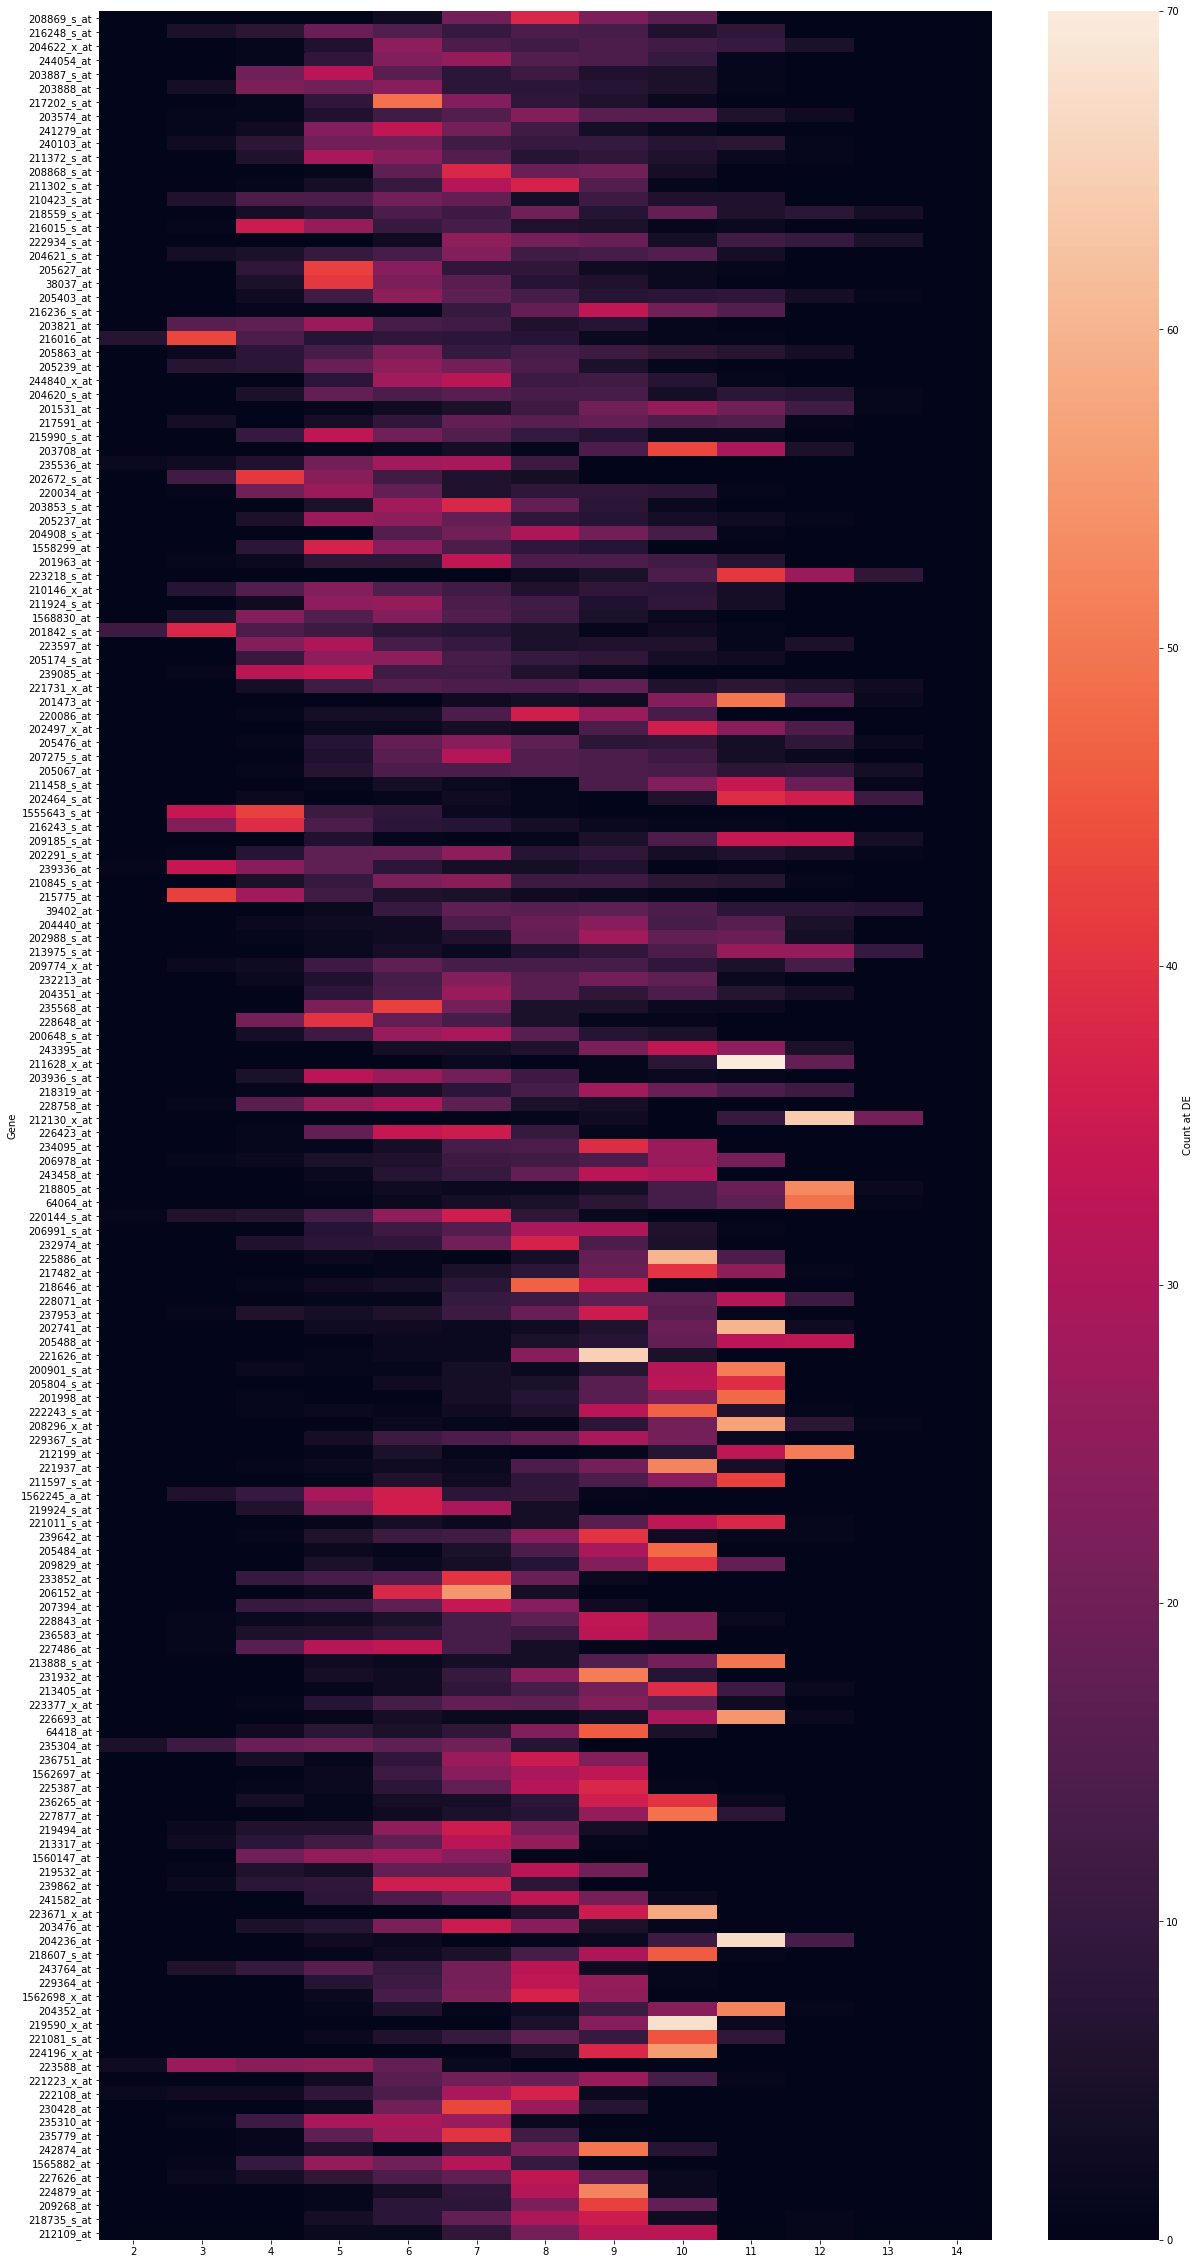

In [150]:
plt.figure(figsize = (20,41))
sns.heatmap(exp_df,cbar_kws={'label': 'Count at DE'})

<AxesSubplot:ylabel='Gene'>

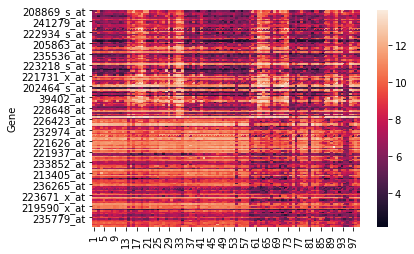

In [172]:
# plt.figure(figsize = (20,41))
sns.heatmap(D_df.T)